# TensorFlow 1

Interest in neural networks, and in particular those with architechures that support deep learning, has been surging in recent years.

In this notebook we will be revisiting the problem of digit classification on the MNIST data. In doing so, we will introduce a new Python library, Tensorflow, for working with neural networks. 

Some words to TensorFlow.

In part 1, we'll introduce Tensorflow, and refresh ourselves on the MNIST dataset. In part 2, we'll create a multi-layer neural network with a simple architechure, and train it using backpropagation. Part 3 will introduce the convolutional architechure, which can be said to be doing 'deep learning' (also called feature learning or representation learning).

#### Part 1: Basics

Lets start to look at Tensorflow. If later you'd like to go deeper into Tensorflow, you may want to read these tutorials: 
https://www.tensorflow.org/tutorials/

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from IPython.display import display, clear_output 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import time
%matplotlib inline

In [2]:
## basic Tensorflow addition
tf.reset_default_graph()
# We build a graph by defining constants and operations (and later variables and placeholders). 
# By tf.constant(), a TensorFlow object is generated from a python object.
a = tf.constant(1.0, shape=[], dtype=tf.float16)
b = tf.constant(2.0, shape=[], dtype=tf.float16)
add1 = tf.add(a,b)
add2 = a + b

# To execute the graph we need to start a session. 
with tf.Session() as sess:
    result = sess.run([add1])
    print(result[0])
    result = sess.run([add2])
    print(result[0])

3.0
3.0


In [3]:
tf.reset_default_graph()
B = tf.constant([0,1,1,1], shape=[2,2])

fibonacci_init = tf.constant([[0],[1]])
fibonacci = tf.get_variable('fibonacci', initializer=fibonacci_init)

# Variable can be assigned and changed. If we run step in a session, fibonacci is overwriten by B*fibonacci
# Matmul stands for matrix multiplication.

#fibonacci = tf.matmul(B, fibonacci)  
fibonacci_step = fibonacci.assign(tf.matmul(B, fibonacci))

print(fibonacci)
with tf.Session() as sess:
    # Variables need to be initialized.
    sess.run(tf.global_variables_initializer())
    for i in range(8):
        # We can run several operation simultaniously. The order of execution is random.

        res_fibonacci, _ = sess.run([fibonacci, fibonacci_step])
        print('Step: ', i, ' Next fibonacci number: ', res_fibonacci[1][0])

<tf.Variable 'fibonacci:0' shape=(2, 1) dtype=int32_ref>
Step:  0  Next fibonacci number:  1
Step:  1  Next fibonacci number:  2
Step:  2  Next fibonacci number:  3
Step:  3  Next fibonacci number:  5
Step:  4  Next fibonacci number:  8
Step:  5  Next fibonacci number:  13
Step:  6  Next fibonacci number:  21
Step:  7  Next fibonacci number:  34


In [4]:
# In Tensorflow, we build a graph by defining tensors.
# If we run a cell twice without the command tf.reset_default_grpah() all tensors are doubly defined, 
# which can lead to errors.
tf.reset_default_graph()

x = tf.get_variable('x', initializer=1.0)

x = tf.Print(x, [x], 'x is calculated.')
y = x + 2.0
y = tf.Print(y, [y], 'y is calculated.')
z = y - 4
z = tf.Print(z, [z], 'z is calculated.')
v = tf.multiply(x,3)
v = tf.Print(v, [v], 'v is calculated.')

# Now out graph is defined. In the session we will execute it.

Dependency of the graph:

\begin{align*}
 &x \\
\swarrow & \searrow  \\
v \quad & \quad y \\
 & \ \quad \searrow\\
 & \ \qquad z
\end{align*}

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # In the session ONLY the nodes of the graph will be calculated, which are needed
    # for the arguments in sess.run()
    # The TF print statement, prints into the terminal. Have a look which variables are calculated
    # by running this session.
    res = sess.run([z])[0]
    print(res)

-1.0


## Linear Regression with TensorFlow

In [6]:
# Creating train_data and train_labels
target_beta = 4.0
noise = 0.2
train_data = np.linspace(-1, 1, 100)
train_labels = target_beta * train_data + np.random.rand(train_data.shape[0]) * noise

[ 3.98015165]


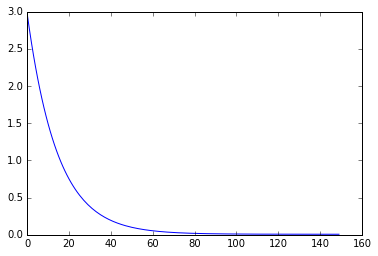

In [7]:
tf.reset_default_graph()
trainX = tf.constant(train_data, dtype = tf.float32)
trainY = tf.constant(train_labels, dtype = tf.float32)
learningRate = tf.constant(0.1)
# without initializer, variables are initializes with random values between -1 and 1.
beta = tf.get_variable('beta', shape=[1])

def model(this_beta, x):
    return tf.multiply(this_beta, x)

def cost(this_beta):
    return tf.reduce_mean((model(this_beta, trainX) - trainY)**2) / 2

cc = cost(beta)

## Gradient descent by hand
def grad(this_beta):
    return tf.reduce_mean(tf.multiply(model(this_beta, trainX) - trainY, trainX))
step = beta.assign(beta - learningRate * grad(beta))

## Gradient descent by tensorflow
gd = tf.train.GradientDescentOptimizer(learningRate)
step = gd.minimize(cost(beta))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    cost_vec = []
    # By running step multiple times, we perform gradient descent for the variable beta. 
    # For each step, we can ouput the cost function.
    for i in range(150):
        _, cost = sess.run([step, cc])
        cost_vec.append(cost)
    plt.plot(cost_vec)
    my_beta = sess.run([beta])[0]
    print(my_beta)

Can we add an intercept to the model above?

[ 3.99113512 -1.89662266]


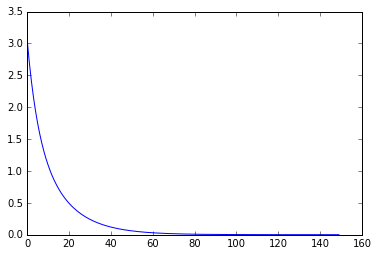

In [8]:
## IMPLEMENT: try adding an intercept to the above model

## YOUR CODE HERE

# Creating train_data and train_labels
target_beta0 = 4.0
target_beta1 = -2.0
noise = 0.2
train_data = np.linspace(-1, 1, 100)
train_labels = target_beta0 * train_data + target_beta1 + np.random.rand(train_data.shape[0]) * noise

tf.reset_default_graph()
trainX = tf.constant(train_data, dtype = tf.float32)
trainY = tf.constant(train_labels, dtype = tf.float32)
learningRate = tf.constant(0.1)
# without initializer, variables are initializes with random values between -1 and 1.
beta = tf.get_variable('beta', shape=[2])

def model(this_beta, x):
    return tf.multiply(this_beta[0], x) + this_beta[1]

def cost(this_beta):
    return tf.reduce_mean((model(this_beta, trainX) - trainY)**2) / 2

cc = cost(beta)

## Gradient descent by hand
def grad(this_beta):
    return tf.reduce_mean(tf.multiply(model(this_beta, trainX) - trainY, trainX))
step = beta.assign(beta - learningRate * grad(beta))

## Gradient descent by tensorflow
gd = tf.train.GradientDescentOptimizer(learningRate)
step = gd.minimize(cost(beta))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    cost_vec = []
    # By running step multiple times, we perform gradient descent for the variable beta. 
    # For each step, we can ouput the cost function.
    for i in range(150):
        _, cost = sess.run([step, cc])
        cost_vec.append(cost)
    plt.plot(cost_vec)
    my_beta = sess.run([beta])[0]
    print(my_beta)

### Classifying MNIST numbers with Neural Nets with TensorFlow

In [9]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
numExamples = 2000
test_data, test_labels = X[70000-numExamples:], Y[70000-numExamples:]
train_data, train_labels = X[:numExamples], Y[:numExamples]
numFeatures = train_data[1].size
numClasses = 10
numTrainExamples = train_data.shape[0]
numTestExamples = test_data.shape[0]
print('Features = %d' %(numFeatures))
print('Train set = %d' %(numTrainExamples))
print('Test set = %d' %(numTestExamples))

Features = 784
Train set = 2000
Test set = 2000


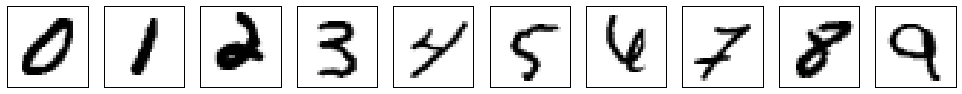

In [10]:
plt.figure(figsize=(17, 5))
plt.rc('image', cmap='binary', interpolation='none')

for i in range(10):
    for idx, l in enumerate(train_labels):
        if str(i)==l:
            ax = plt.subplot(1, 10, i+1)
            plt.setp(ax, xticks=(), yticks=())  
            plt.imshow(train_data[idx].reshape(28, 28))
            break
plt.show()

Looking ahead to working with neural networks, let's prepare one additional variation of the label data.  Let's make these labels, rather than each being an integer value from 0-9, be a set of 10 binary values, one for each class.  This is sometimes called a 1-of-n encoding, and it makes working with Neural Networks easier, as there will be one output node for each class.

In [11]:
tf.reset_default_graph()
original_Y = tf.constant(train_labels[:10])

bin_Y = tf.one_hot(train_labels[:10], 10)

with tf.Session() as sess:
    res_original_Y, res_bin_Y = sess.run([original_Y, bin_Y])
    print(res_bin_Y)
    print()
    print(res_original_Y.astype(int))
    

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]

[ 3.  7.  1.  6.  3.  4.  1.  6.  8.  5.]


Let's start working in TensorFlow.  Before we jump to multi-layer neural networks though, let's train a logistic regression model to make certain we're using Tensorflow correctly. 

Recall from Josh's regression lecture the four key components: (1) parameters, (2) model, (3) cost function, and (4) objective. 

In [12]:
# (1) Parameters

tf.reset_default_graph()

# Constants
trainY = tf.one_hot(train_labels, 10)
testY = tf.one_hot(test_labels, 10)
trainX = tf.constant(train_data, dtype = tf.float32)
testX = tf.constant(test_data, dtype = tf.float32)

# and Variables
w = tf.get_variable('w', shape=[numFeatures, numClasses])
#w = tf.Print(w, [w], 'weights are updated.')

Two notes relevant at this point:

First, logistic regression can be thought of as a neural network with no hidden layers. The output values are just the dot product of the inputs and the edge weights.

Second, we have 10 classes. We can either train separate one vs all classifiers using sigmoid activation, which would be a hassle, or we can use the softmax activation, which is essentially a multi-class version of sigmoid. We'll use Theano's built-in implementation of softmax.

$$x\in \mathbb{R}^n$$

$$\sigma(x)_j = \frac{e^{x_j}}{\sum_{i=0}^n e^{x_i}}$$

$$\sum_{j}\sigma(x)_j=1$$

In [13]:
# (2) Model

def model(input_layer):
    output_layer = tf.nn.softmax(tf.matmul(input_layer, w))
    return output_layer

We'll use cross-entropy as a cost function.  Cross entropy only considers the error between the true class and the prediction, and not the errors for the false classes.  This tends to cause the network to converge faster.  We'll use Tensorflow's built-in cross entropy function.

In [14]:
# (3) Cost
#?tf.losses.log_loss
def cost_func(data, labels):
    cc = tf.losses.log_loss(labels, model(data))
    return  cc

The objective is minimize the cost, and to do that we'll use gradient descent.

We'll use Tensorflow's built-in gradient function.  Exercise: Do you recall from Josh's lecture what the gradient is for beta in logistic regression?

951) accuracy = 0.8425


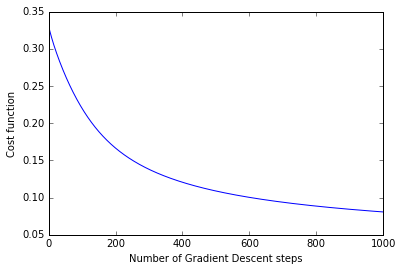

In [53]:
# (4) Ojbective (and solver)

cc = cost_func(trainX, trainY)
gd = tf.train.GradientDescentOptimizer(learning_rate=0.1)
step = gd.minimize(cc)
test_preds = model(testX)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_vec = []
    for i in range(1000):
        _, cost, test__preds = sess.run([step, cc, test_preds])
        cost_vec.append(cost)
        if i%50 == 0:
            clear_output(wait=True)
            print('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(test__preds, axis=1) == test_labels.astype(int))))
    
plt.plot(cost_vec)  
plt.xlabel('Number of Gradient Descent steps')
plt.ylabel('Cost function')
plt.show()

Now we'll use batch gradient descent.

Exercise: What are the differences between batch, stochastic, and mini-batch gradient descent?  What are the implications of each for working on large datasets?

80) accuracy = 0.8780


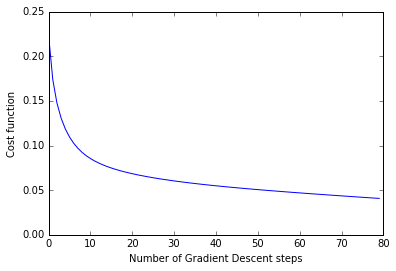

In [62]:
# (1) Parameters
tf.reset_default_graph()

# Constants
testY = tf.one_hot(test_labels, numClasses)
testX = tf.constant(test_data, dtype = tf.float32)

# placeholders
# In Tensorflow, placeholder are prepared to be filled with different python objects in the session.
# Using these placeholder, we don't need to transform the python objects train_data and train_labels into 
# Tensorflow object. tf.placeholder does this for us.
x_ = tf.placeholder(tf.float32, shape=[None, numFeatures], name='x')
y_ = tf.placeholder(tf.int32, shape=[None], name='y')

# and Variables
w = tf.get_variable('w', shape=[numFeatures, numClasses])


# (2) Model
def model(input_layer):
    output_layer = tf.nn.softmax(tf.matmul(input_layer, w))
    return output_layer

# (3) Cost
def cost_func(data, labels):
    cc = tf.losses.log_loss(labels, model(data))
    return  cc

# (4) Ojbective (and solver)
y_one_hot = tf.one_hot(y_, numClasses)
cc = cost_func(x_, y_one_hot)
gd = tf.train.GradientDescentOptimizer(learning_rate=0.1)
step = gd.minimize(cc)
test_preds = model(testX)

miniBatchSize = 10;
num_samples = train_data.shape[0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_vec = []
    for i in range(50):
        for start, end in zip(range(0, num_samples, miniBatchSize), range(miniBatchSize, num_samples, miniBatchSize)):
            batch = train_data[start:end], train_labels[start:end]
            # If we run step in the session, we specify x_ and y_ by using fed_dict as argument
            _, cost, test__preds = sess.run([step, cc, test_preds], feed_dict={x_: batch[0], y_: batch[1]})
        cost_vec.append(cost)
        clear_output(wait=True)
        print('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(test__preds, axis=1) == test_labels.astype(int))))
        
    # We find some correctly and wrongly predicted test samples    
    count_correct = 0
    count_wrong = 0
    idx_correct = []
    idx_wrong = []
    predicted_as = []
    for idx, p, l in zip(range(len(test_labels)), np.argmax(test__preds, axis=1), test_labels):
        if p == int(l) and count_correct < 3:
            idx_correct.append(idx)
            count_correct += 1
        elif p != int(l) and count_wrong < 3:
            idx_wrong.append(idx)
            predicted_as.append(p)
            count_wrong += 1
    
plt.plot(cost_vec)  
plt.xlabel('Number of Gradient Descent steps')
plt.ylabel('Cost function')
plt.show()

Correctly predicted:


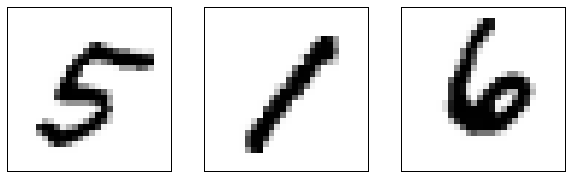

Wrongly predicted:
Predicted as:  3
Predicted as:  8
Predicted as:  9


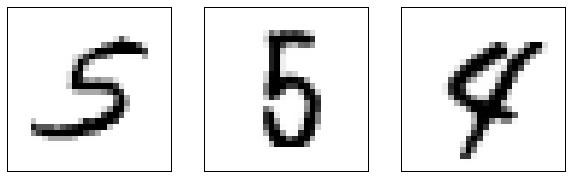

In [63]:
##################  correctly predicted ##############
plt.figure(figsize=(10, 5))
plt.rc('image', cmap='binary', interpolation='none')

print("Correctly predicted:")
for i, idx in enumerate(idx_correct):
    ax = plt.subplot(1, count_correct, i+1)
    plt.setp(ax, xticks=(), yticks=())  
    plt.imshow(test_data[idx].reshape(28, 28))
plt.show()

################### wrongly predicted ##############
plt.figure(figsize=(10, 5))
plt.rc('image', cmap='binary', interpolation='none')

print("Wrongly predicted:")
for i, idx in enumerate(idx_wrong):
    print("Predicted as: ", predicted_as[i])
    ax = plt.subplot(1, count_correct, i+1)
    plt.setp(ax, xticks=(), yticks=())  
    plt.imshow(test_data[idx].reshape(28, 28))
plt.show()